In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets, metrics

<IPython.core.display.Javascript object>

In [5]:
# 1. 
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

labels = KMeans(n_clusters=2).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric="euclidean"))

0.5817500491982808


<IPython.core.display.Javascript object>

In [6]:
# From the last assignment plot of the 2 cluster solution, the data is more easily grouped
# into 2 clusters because 2 of the 3 clusters overlap

<IPython.core.display.Javascript object>

In [15]:
# 2.
from sqlalchemy import create_engine

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"

engine = create_engine(
    f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"
)

sql = """
    SELECT * FROM heartdisease
"""

heartdisease_df = pd.read_sql(sql, engine)
engine.dispose()

<IPython.core.display.Javascript object>

In [30]:
heartdisease_df_even = heartdisease_df.sample(302)

<IPython.core.display.Javascript object>

In [31]:
# Define the features and the outcome
X = heartdisease_df_even.iloc[:, :13]
y = heartdisease_df_even.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace="?", value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

<IPython.core.display.Javascript object>

1. Split the data randomly into two. Apply k-means using two, three, and four as the number of clusters, as you did when you were exploring consistency earlier in this checkpoint. Assess the consistency of the solutions using visualization. Which one seems to be the best?

In [32]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(X_std, X_pca, test_size=0.5)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([(X_half1, X_pcahalf1), (X_half2, X_pcahalf2)]):

    # Put the features into ypred.
    ypred["pca_f1" + "_sample" + str(counter)] = data[1][:, 0]
    ypred["pca_f2" + "_sample" + str(counter)] = data[1][:, 1]

    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust).fit_predict(data[counter])
        ypred["clust" + str(nclust) + "_sample" + str(counter)] = pred

<IPython.core.display.Javascript object>

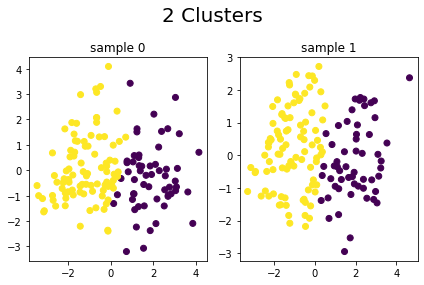

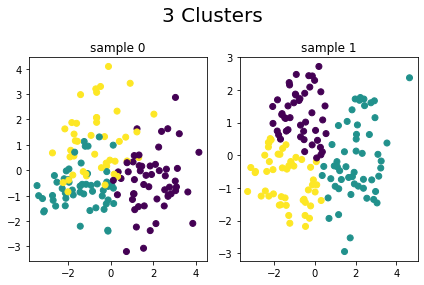

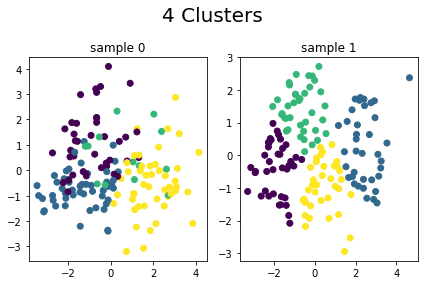

<IPython.core.display.Javascript object>

In [33]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):

    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)

    # Make a plot for each sample.
    for i in range(2):

        # PCA-created features.
        x_sub = ypred["pca_f1_sample{}".format(i)]
        y_sub = ypred["pca_f2_sample{}".format(i)]

        # Cluster assignments.
        c = ypred["clust{}_sample{}".format(cluster, i)]

        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title("sample {}".format(i))

    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle("{} Clusters".format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print("\n")

In [34]:
# 2 clusters seems to be the best

<IPython.core.display.Javascript object>

2. Apply k-means on the whole dataset by setting k equal to 2, 3, and 4. Get the ARI score for each of them. Which model is best?

In [46]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

n_clusters = [2,3,4]
for i in n_clusters:
    kmeans_cluster = KMeans(n_clusters=i, n_init=20)
    kmeans_cluster.fit(X_std)
    y_pred = kmeans_cluster.predict(X_std)
    print(f"ARI score for {i} clusters: {metrics.adjusted_rand_score(y, y_pred)}")




ARI score for 2 clusters: 0.43661540614807665
ARI score for 3 clusters: 0.27529804519756434
ARI score for 4 clusters: 0.20182304933711265


<IPython.core.display.Javascript object>

In [44]:
# 2 clusters has the highest ARI score

<IPython.core.display.Javascript object>

3. Apply k-means on the whole dataset by setting k equal to 2, 3, and 4. Get the silhouette coefficient for each of them. Which model is best?

In [49]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

n_clusters = [2, 3, 4]
for i in n_clusters:
    kmeans_cluster = KMeans(n_clusters=i, n_init=20)
    kmeans_cluster.fit(X_std)
    y_pred = kmeans_cluster.predict(X_std)
    print(
        f"Silhouette coefficient {i} clusters: {metrics.silhouette_score(X_std, y_pred, metric='euclidean')}"
    )

Silhouette coefficient 2 clusters: 0.17578471177261873
Silhouette coefficient 3 clusters: 0.129717007450309
Silhouette coefficient 4 clusters: 0.1341532093971284


<IPython.core.display.Javascript object>

In [50]:
# 2 clusters has the highest silhouette coefficient

<IPython.core.display.Javascript object>